<a href="https://colab.research.google.com/github/amansatyam18/amansatyam18/blob/main/IRIS_classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Classification problem on the basis of some attributes.

# Data Preprocessing

In [3]:
# Importing libraries for data analysis, visualization and machine learning.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing the dataset
from sklearn.datasets import load_iris
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
# Attributes of the dataset
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# Understandng the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
# Looking at the Target variable
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
# Target classes
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


* setosa -> 0
* versicolor -> 1
* virginica -> 2

In [9]:
# Feature names
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
# Creating Dataframe
data = pd.DataFrame(np.c_[iris["data"] , iris["target"]] , columns = np.append(iris["feature_names"] , ["target_names"]))
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
# Checking if our data contains any null values
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target_names         0
dtype: int64

In [12]:
# Statistical Data of our dataframe
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
# Columns of dataset
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target_names'],
      dtype='object')

In [14]:
data.columns = ["Sepal_length","Sepal_width","Petal_length","Petal_width","Target"]
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Data Visualization

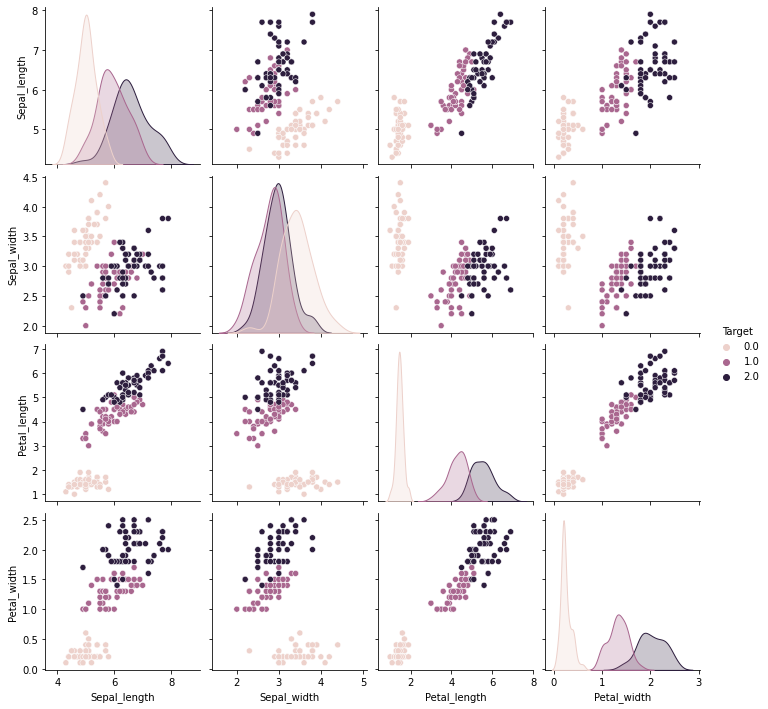

In [15]:
# Pairplot to understand relation among different attributes of the dataset
sns.pairplot(data=data, hue = "Target")

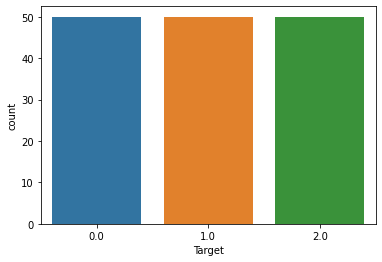

In [16]:
# Count plot
sns.countplot(data=data, x="Target")

* All of the target variables are equal i.e 50

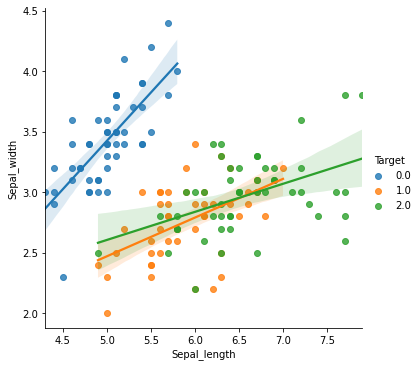

In [17]:
# Multiple Regression line plot
sns.lmplot(data = data, x="Sepal_length", y = "Sepal_width", hue = "Target")

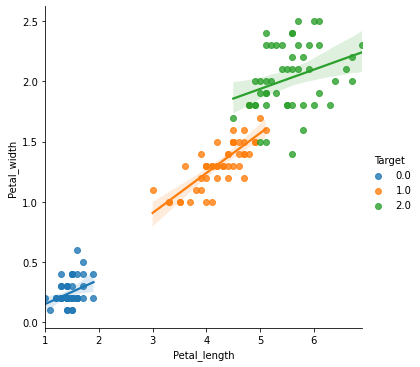

In [18]:
sns.lmplot(data= data, x = "Petal_length", y="Petal_width", hue="Target")

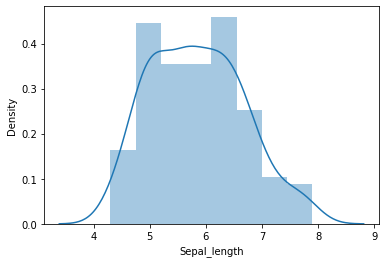

In [19]:
# Distplots
sns.distplot(data.Sepal_length)

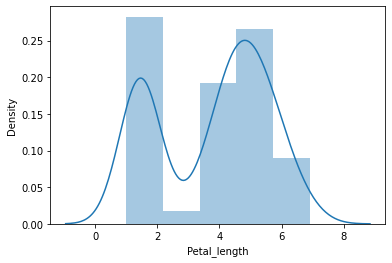

In [20]:
sns.distplot(data.Petal_length)

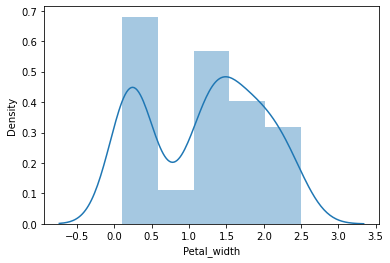

In [21]:
sns.distplot(data.Petal_width)

# Deploying Machine learning Model

In [22]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [23]:
# Assigning attributes to the variables
X = data.drop(columns=["Target"]).values
y = data["Target"].values

In [24]:
# Splitting data into trainng and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=None)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[5.2 4.1 1.5 0.1]
 [6.3 2.5 5.  1.9]
 [7.2 3.2 6.  1.8]
 [5.6 2.5 3.9 1.1]
 [5.5 3.5 1.3 0.2]
 [7.2 3.6 6.1 2.5]
 [4.9 3.  1.4 0.2]
 [5.  3.4 1.5 0.2]
 [5.1 3.7 1.5 0.4]
 [4.8 3.1 1.6 0.2]
 [5.2 3.4 1.4 0.2]
 [6.7 3.  5.2 2.3]
 [5.5 2.5 4.  1.3]
 [5.7 2.8 4.1 1.3]
 [5.6 2.7 4.2 1.3]
 [5.8 2.7 4.1 1. ]
 [6.7 3.1 4.4 1.4]
 [4.9 2.4 3.3 1. ]
 [6.4 3.2 5.3 2.3]
 [5.1 3.3 1.7 0.5]
 [6.1 3.  4.9 1.8]
 [7.  3.2 4.7 1.4]
 [6.3 3.4 5.6 2.4]
 [5.3 3.7 1.5 0.2]
 [6.  3.  4.8 1.8]
 [5.5 4.2 1.4 0.2]
 [5.  2.3 3.3 1. ]
 [5.4 3.7 1.5 0.2]
 [6.1 2.8 4.  1.3]
 [5.  3.5 1.3 0.3]
 [5.5 2.4 3.8 1.1]
 [6.7 3.3 5.7 2.5]
 [5.  3.4 1.6 0.4]
 [6.7 3.3 5.7 2.1]
 [6.  3.4 4.5 1.6]
 [4.8 3.4 1.6 0.2]
 [5.7 2.9 4.2 1.3]
 [5.1 3.8 1.9 0.4]
 [6.8 3.  5.5 2.1]
 [6.3 3.3 4.7 1.6]
 [5.8 2.8 5.1 2.4]
 [6.1 2.8 4.7 1.2]
 [7.7 2.8 6.7 2. ]
 [6.5 3.  5.2 2. ]
 [5.  3.6 1.4 0.2]
 [5.2 3.5 1.5 0.2]
 [5.4 3.4 1.5 0.4]
 [5.8 2.6 4.  1.2]
 [4.6 3.6 1.  0.2]
 [6.3 2.3 4.4 1.3]
 [5.7 3.8 1.7 0.3]
 [5.  3.5 1.6 0.6]
 [7.9 3.8 6.

In [25]:
# Deploying model
classifier = SVC(kernel = "rbf", random_state=None)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
# Predicting values from model
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.93      0.87      0.90        15
         2.0       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



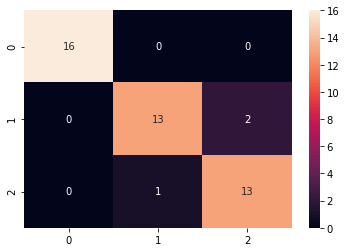

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred)
print(report)

# Heatmap for more clear visualization
sns.heatmap(data = cm, annot = True)

* Accuracy is 93%

Improving this model through Normalizing, and Grid Search by:
* Normalizing the data
* Changing C and Gamma parameters

In [28]:
# Normalization of data
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

print(X_train)
print(X_test)

[[0.76578311 0.60379053 0.22089897 0.0147266 ]
 [0.72965359 0.28954508 0.57909015 0.22005426]
 [0.71529453 0.31790868 0.59607878 0.17882363]
 [0.76185188 0.34011245 0.53057542 0.14964948]
 [0.82699754 0.52627116 0.19547215 0.03007264]
 [0.69198788 0.34599394 0.58626751 0.24027357]
 [0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80218492 0.54548574 0.24065548 0.0320874 ]
 [0.78591858 0.57017622 0.23115252 0.06164067]
 [0.80846584 0.52213419 0.26948861 0.03368608]
 [0.81609427 0.5336001  0.21971769 0.03138824]
 [0.72155725 0.32308533 0.56001458 0.24769876]
 [0.74714194 0.33960997 0.54337595 0.17659719]
 [0.7431482  0.36505526 0.5345452  0.16948994]
 [0.73544284 0.35458851 0.55158213 0.1707278 ]
 [0.75676497 0.35228714 0.53495455 0.13047672]
 [0.76945444 0.35601624 0.50531337 0.16078153]
 [0.75916547 0.37183615 0.51127471 0.15493173]
 [0.69589887 0.34794944 0.57629125 0.25008866]
 [0.80597792 0.52151512 0.26865931 0.07901744]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.76701103 

In [29]:
# Changing C and Gamma Parameters
from sklearn.model_selection import GridSearchCV

parameters = {"C":[0.1, 1, 10, 100, 1000], "kernel": ["rbf","linear"], 
           "gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

gridsearch = GridSearchCV(estimator = classifier, param_grid=parameters, n_jobs=-1,cv =10)

gridsearch = gridsearch.fit(X_train, y_train)

best_parameters = gridsearch.best_params_
print(best_parameters)

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}


In [30]:
# Initializing object with best parameters from Grid Search
classifier2 = SVC(C=10, gamma=0.2, kernel ="rbf", random_state=None)
classifier2.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
# Predicting values from classifier2
y_pred2 = classifier2.predict(X_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.67      0.80        15
         2.0       0.74      1.00      0.85        14

    accuracy                           0.89        45
   macro avg       0.91      0.89      0.88        45
weighted avg       0.92      0.89      0.89        45

Accuracy is: 100 %


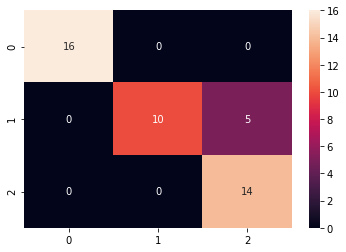

In [32]:
# Accuracy and Report of our Model
cm2 = confusion_matrix(y_test, y_pred2)

report2 = classification_report(y_test, y_pred2)
print(report2)

accuracy = 100
print("Accuracy is:", accuracy,"%")
# Making Heatmap
sns.heatmap(data = cm2, annot=True)

In [38]:
iris_classes= ['Setosa','versicolour','Virginica']
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [52]:
new_input=np.array([[5.2,3.1,1.6,0.2,],[6.1,4.1,1.5,0.3]])
print("New Input:",new_input)
new_output=classifier2.predict(new_input)
for result in new_output:
  print("New Output:",result)

New Input: [[5.2 3.1 1.6 0.2]
 [6.1 4.1 1.5 0.3]]
New Output: 0.0
New Output: 0.0


* In this model i used StandardScaler and GridSearchCV for improving the accuracy.Therefore our Support Vector Machine Model's Accuracy is increased from 93% to 100% through GridSearchCV and normalizing data.